In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
x = pd.read_csv('assets/data/ML1.1 linear regression/data/x.csv',
                index_col=0)['0']
y = pd.read_csv('assets/data/ML1.1 linear regression/data/y.csv',
                index_col=0)['0']

In [58]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [59]:
x.shape, y.shape

((20,), (20,))

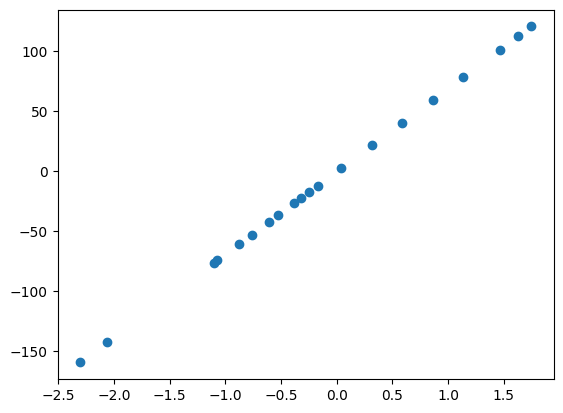

In [60]:
plt.figure()
plt.scatter(x, y)
plt.show()

Формула среднеквадратичной ошибки:

![Среднеквадратичная ошибка](assets/images/sh_0019.png)

In [61]:
class Model():
    """Модель парной линейной регрессии y = b0 + b1 * x"""

    def __init__(self):
        """Начальные значения коэффициентов"""
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        """Предсказание значения по подобранным коэффициентам"""
        return self.b0 + self.b1 * x

    def error(self, x, y):
        """Расчет ошибки по формуле J = y_pred - y_true, в качестве аргументов может быть передано не отдельное значение, а серия"""
        return sum((self.predict(x) - y) ** 2) / (2 * len(y))

    def fit(self, x, y):
        """Функция обучения"""
        # Скорость обучения, не должна быть слишком большой, иначе градиентный спуск может разойтись.
        # Однако если корректировать это значение по ошибке, то можно брать и большое.
        alfa = 2
        # Данные для построения кривой обучения
        errors = [self.error(x, y)]
        for _ in range(20):
            dJ0 = sum(self.predict(x) - y) / len(y)
            dJ1 = sum((self.predict(x) - y) * x) / len(y)
            self.b0 -= alfa * dJ0
            self.b1 -= alfa * dJ1
            
            # Коррекция alfa + возврат в исходную точку градиентного спуска.
            new_err = self.error(x, y)
            old_err = errors[-1]
            
            if new_err > old_err:
                alfa /= 2
                self.__init__()
                
            errors.append(new_err)    
        return errors

In [62]:
model = Model()
print("Начальная ошибка: ", model.error(x, y))

Начальная ошибка:  2937.6446095153406


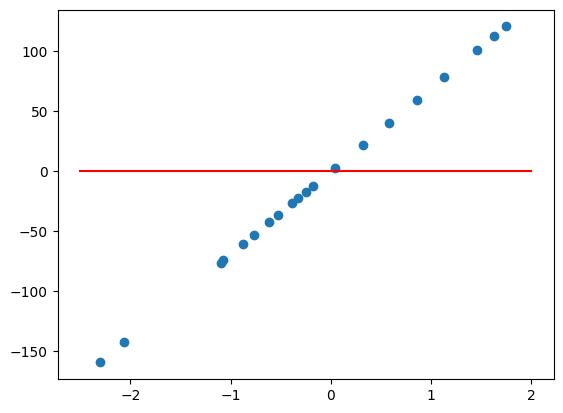

In [63]:
plt.figure()
plt.scatter(x, y)

# Пробуем построить график, причем используем не исходные данные, а сгенерированные!
# Это помогает избегать ошибок на более сложных функциях.
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)

plt.plot(x_pred, y_pred, 'r')
plt.show()

In [64]:
# Видно, что теоретически предсказанные значения далеки от реальных.
# Нужно обучить модель!

errors = model.fit(x, y)
print("Конечная ошибка: ", model.error(x, y))

Конечная ошибка:  8.219846927945362e-18


[2937.6446095153406, 6634.6370759526635, 213.7800430216267, 17.72598711993926, 1.479211885397035, 0.12347438476057286, 0.010306924606085437, 0.0008603627290350647, 7.181812946016475e-05, 5.994964160459717e-06, 5.004251093279588e-07, 4.1772608368551725e-08, 3.486936960398904e-09, 2.9106943153864486e-10, 2.4296801172498107e-11, 2.0281571371353087e-12, 1.6929888724214915e-13, 1.4132096861939487e-14, 1.1796659338146087e-15, 9.847162296170064e-17, 8.219846927945362e-18]


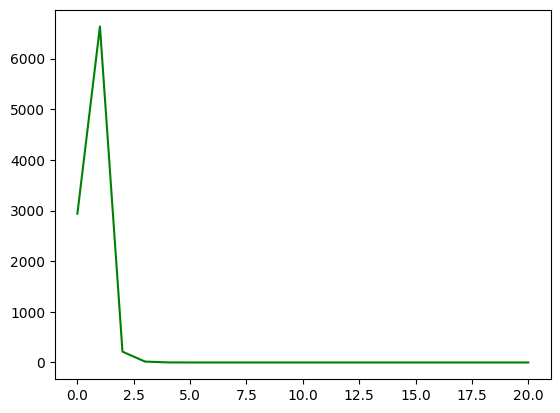

In [65]:
# Кривая обучения
print(errors)
plt.plot(errors, 'g')

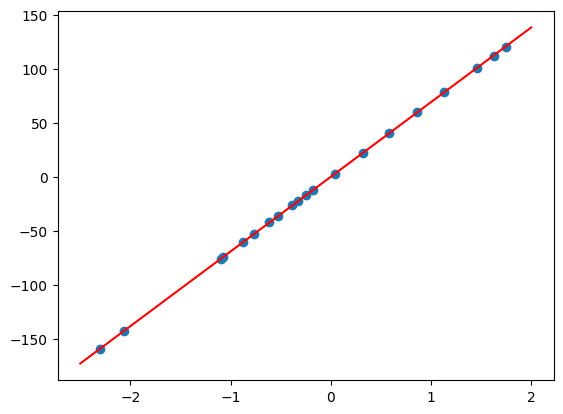

In [66]:
# Этот код дублирует код выше
plt.figure()
plt.scatter(x, y)

# Пробуем построить график, причем используем не исходные данные, а сгенерированные!
# Это помогает избегать ошибок на более сложных функциях.
x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)

plt.plot(x_pred, y_pred, 'r')
plt.show()